In [1]:
import sys

sys.argv = ["jupyter","--dataroot", "./datasets/brats2013", "--model", "cycle_gan"]

sys.argv += ["--name", "brats2013_cyclegan"]
sys.argv += ["--checkpoints_dir", "./checkpoints"]
sys.argv += ["--no_flip"]
sys.argv += ["--no_html"]
sys.argv += ["--input_nc", "1"]
sys.argv += ["--output_nc", "1"]
sys.argv += ["--resize_or_crop", "scale_width_and_crop"]
sys.argv += ["--nThreads", "1"]

#sys.argv += ["--continue_train"]


import time
from options.train_options import TrainOptions
opt = TrainOptions().parse()  # set CUDA_VISIBLE_DEVICES before import torch

from data.data_loader import CreateDataLoader
from models.models import create_model
import util.util as util


------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: ./checkpoints
continue_train: False
dataroot: ./datasets/brats2013
dataset_mode: unaligned
display_freq: 100
display_id: 1
display_port: 8097
display_single_pane_ncols: 0
display_winsize: 256
epoch_count: 1
fineSize: 256
gpu_ids: [0]
identity: 0.5
init_type: normal
input_nc: 1
isTrain: True
lambda_A: 10.0
lambda_B: 10.0
loadSize: 286
lr: 0.0002
lr_decay_iters: 50
lr_policy: lambda
max_dataset_size: inf
model: cycle_gan
nThreads: 1
n_layers_D: 3
name: brats2013_cyclegan
ndf: 64
ngf: 64
niter: 100
niter_decay: 100
no_dropout: False
no_flip: True
no_html: True
no_lsgan: False
norm: instance
output_nc: 1
phase: train
pool_size: 50
print_freq: 100
resize_or_crop: scale_width_and_crop
save_epoch_freq: 5
save_latest_freq: 5000
serial_batches: False
update_html_freq: 1000
which_direction: AtoB
which_epoch: latest
which_model_netD: basic
which_model_netG: resnet_9blocks
-------------- End ----------------


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
data_loader = CreateDataLoader(opt)
dataset = data_loader.load_data()
dataset_size = len(data_loader)
print('#training images = %d' % dataset_size)


CustomDatasetDataLoader
dataset [UnalignedDataset] was created
#training images = 1553


In [4]:
for i, data in enumerate(dataset):
    img = data
    break

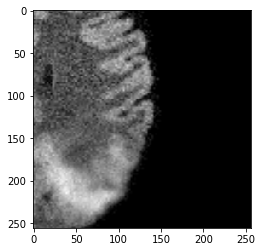

In [7]:
plt.imshow(util.tensor2im(img["A"]))

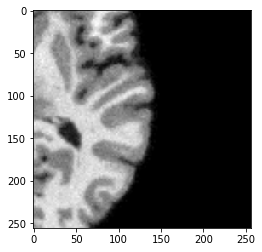

In [8]:
plt.imshow(util.tensor2im(img["B"]))

In [9]:
model = create_model(opt)
total_steps = 0

cycle_gan
initialization method [normal]
initialization method [normal]
initialization method [normal]
initialization method [normal]
---------- Networks initialized -------------
ResnetGenerator(
  (model): Sequential(
    (0): ReflectionPad2d((3, 3, 3, 3))
    (1): Conv2d (1, 64, kernel_size=(7, 7), stride=(1, 1))
    (2): InstanceNorm2d(64, eps=1e-05, momentum=0.1, affine=False)
    (3): ReLU(inplace)
    (4): Conv2d (64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): InstanceNorm2d(128, eps=1e-05, momentum=0.1, affine=False)
    (6): ReLU(inplace)
    (7): Conv2d (128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (8): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
    (9): ReLU(inplace)
    (10): ResnetBlock(
      (conv_block): Sequential(
        (0): ReflectionPad2d((1, 1, 1, 1))
        (1): Conv2d (256, 256, kernel_size=(3, 3), stride=(1, 1))
        (2): InstanceNorm2d(256, eps=1e-05, momentum=0.1, affine=False)
        (3): ReLU(i

In [10]:
print "a"

a


In [ ]:
for epoch in range(1, opt.niter + opt.niter_decay + 1):
    epoch_start_time = time.time()
    for i, data in enumerate(dataset):
        iter_start_time = time.time()
        total_steps += opt.batchSize
        epoch_iter = total_steps - dataset_size * (epoch - 1)
        model.set_input(data)
        model.optimize_parameters()

        if total_steps % opt.print_freq == 0:
            errors = model.get_current_errors()
            t = (time.time() - iter_start_time) / opt.batchSize
            print epoch, float(epoch_iter)/dataset_size, errors

        if total_steps % opt.save_latest_freq == 0:
            print('saving the latest model (epoch %d, total_steps %d)' % (epoch, total_steps))
            model.save('latest')
        
    if epoch % opt.save_epoch_freq == 0:
        print('saving the model at the end of epoch %d, iters %d' % (epoch, total_steps))
        model.save('latest')
        model.save(epoch)

    print('End of epoch %d / %d \t Time Taken: %d sec' %
          (epoch, opt.niter + opt.niter_decay, time.time() - epoch_start_time))

    if epoch > opt.niter:
        model.update_learning_rate()


1 0.064391500322 OrderedDict([('D_A', 0.27439963817596436), ('G_A', 0.19941793382167816), ('Cyc_A', 1.1841614246368408), ('D_B', 0.2921493649482727), ('G_B', 0.26110178232192993), ('Cyc_B', 0.5659737586975098), ('idt_A', 0.2887708246707916), ('idt_B', 0.6016162037849426)])


In [25]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

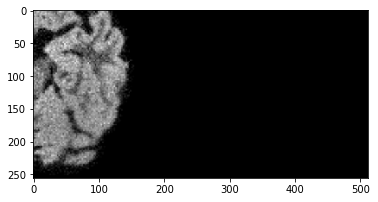

In [26]:
plt.imshow(np.concatenate([model.get_current_visuals()['real_A'],model.get_current_visuals()['fake_B']],axis=1))

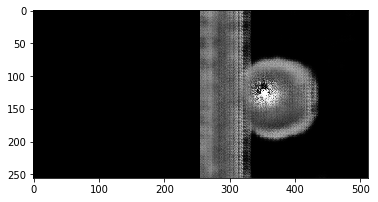

In [27]:
plt.imshow(np.concatenate([model.get_current_visuals()['real_B'],model.get_current_visuals()['fake_A']],axis=1))